In [94]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [47]:
# Chargons le dataset
df= pd.read_csv('marketing_campaign axa.csv', sep=';')

In [49]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
# Affichons les premières lignes du dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
# Affichons les informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
# Obtenir des statistiques descriptives pour les variables numériques
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Prétraitement des Données
#### Gestion des Valeurs Manquantes :
#### Identifions les colonnes contenant des valeurs manquantes et décidons comment les gérer

In [16]:
# Vérifions les valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Income    24
dtype: int64

##### Les valeurs manquantes dans la colonne 
##### "Income" peuvent poser des problèmes dans notre analyse, surtout si "Income" est une variable importante pour notre modèle ou nos analyses.
##### Voici les étapes que nous pouvons suivre pour traiter ces valeurs manquantes :

In [26]:
# Imputation des valeurs manquantes de la colonne Income avec la moyenne
df['Income'].fillna(df['Income'].mean(), inplace=True)

C:\Users\MOHAMED FAYE\AppData\Local\Temp\ipykernel_8292\2727942210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


In [30]:
# Vérifions les valeurs manquantes
df.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Normalisation ou Standardisation 

In [35]:
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Encodage des Variables Catégoriques :

#### Convertissons les variables catégoriques en format numérique, par exemple en utilisant l'encodage One-Hot.

In [39]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

 ## Analyse Exploratoire des Données (EDA)
#### Statistiques Descriptives

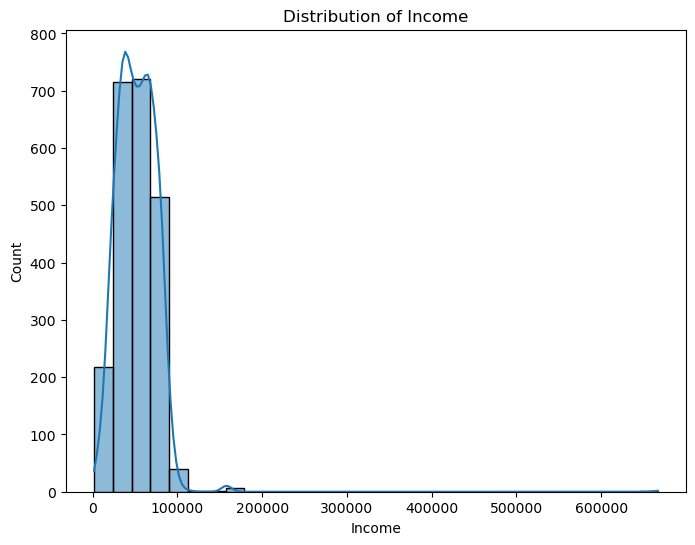

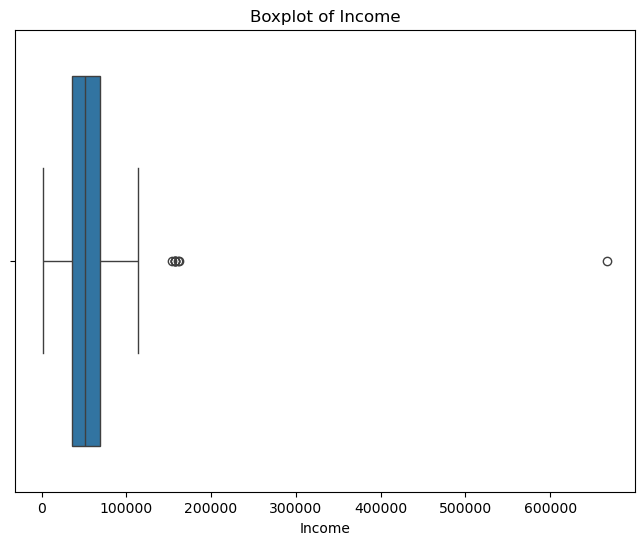

In [55]:
# Histogramme de la variable 'Income'
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.show()

# Boxplot pour visualiser les outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()

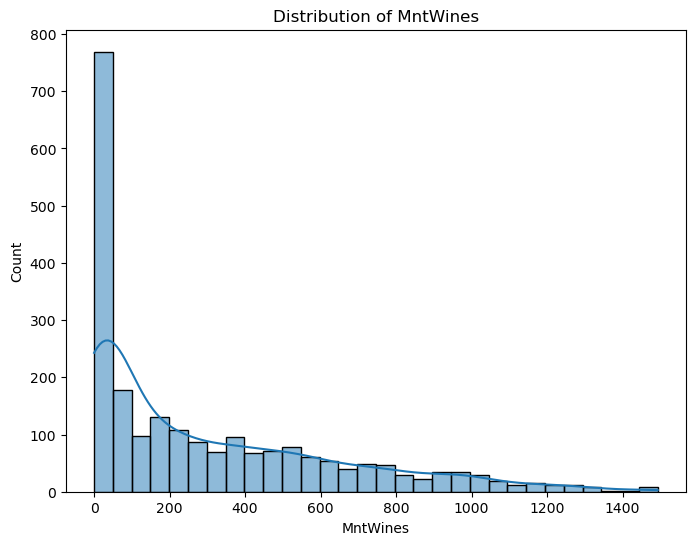

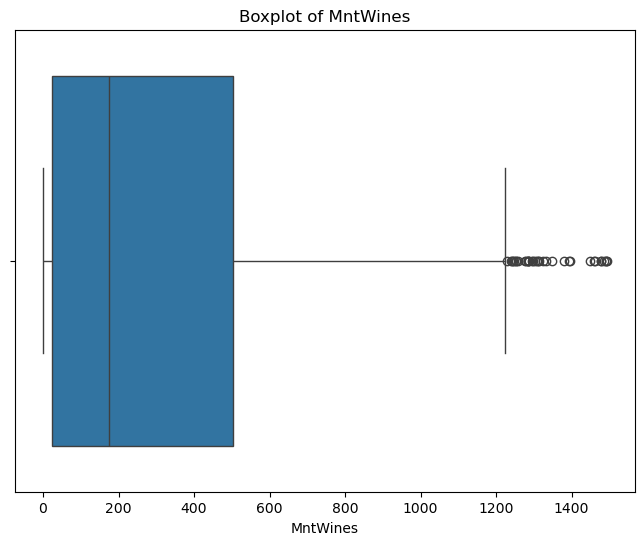

In [57]:
# Histogramme de la variable 'MntWines'
plt.figure(figsize=(8, 6))
sns.histplot(df['MntWines'], bins=30, kde=True)
plt.title('Distribution of MntWines')
plt.show()

# Boxplot pour visualiser les outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MntWines'])
plt.title('Boxplot of MntWines')
plt.show()

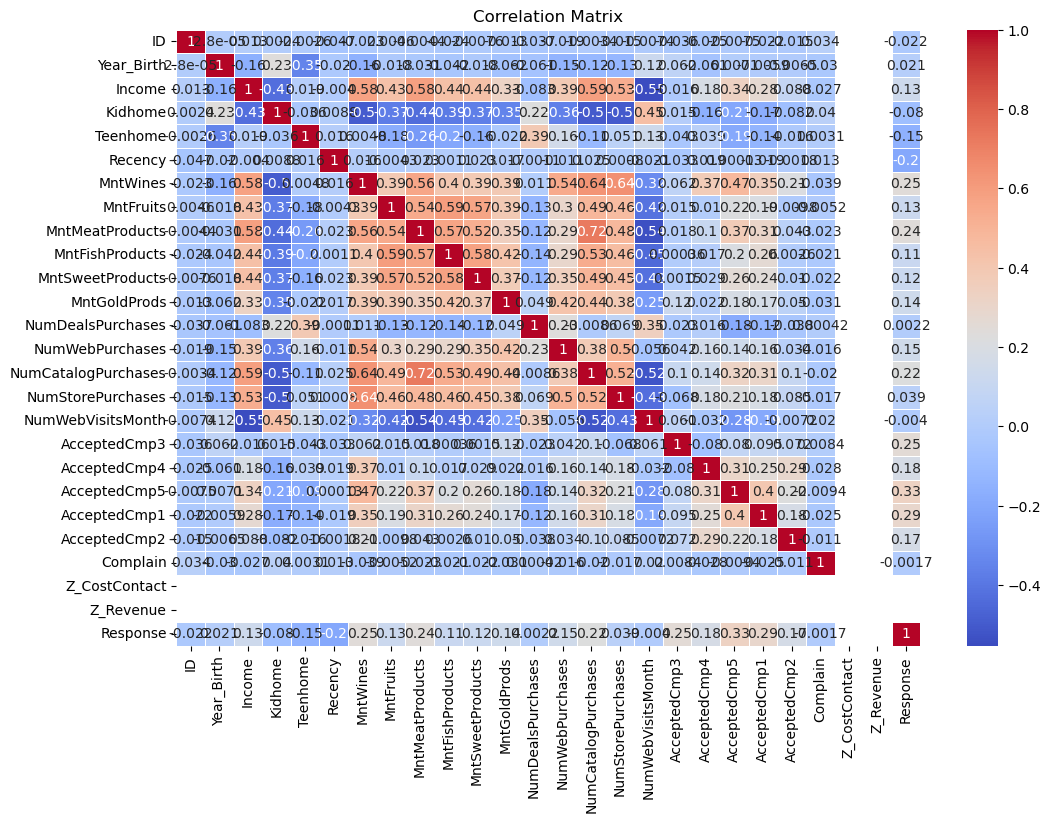

In [61]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

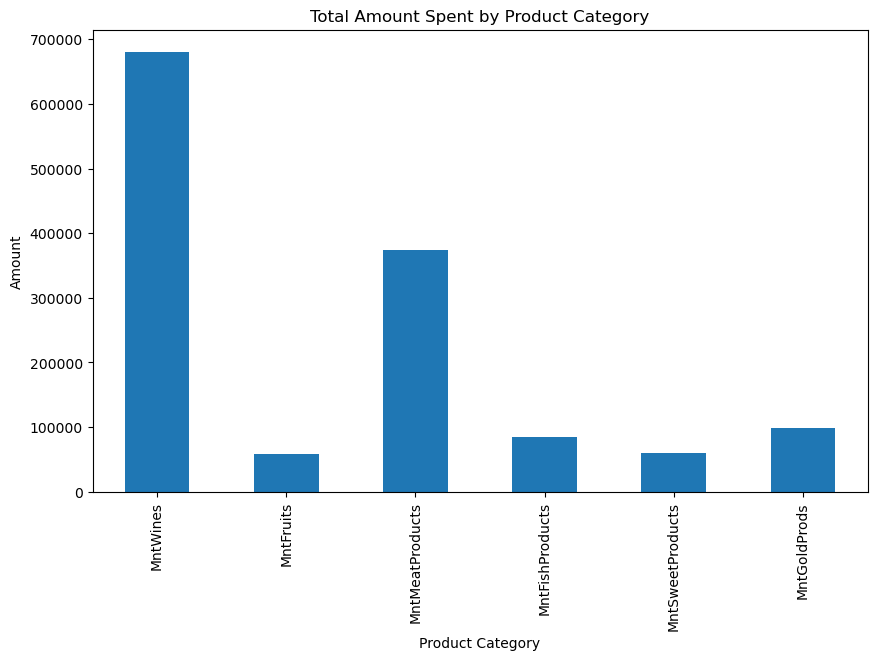

In [63]:
# Comparaison des montants dépensés dans différentes catégories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(10, 6))
df[categories].sum().plot(kind='bar')
plt.title('Total Amount Spent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.show()


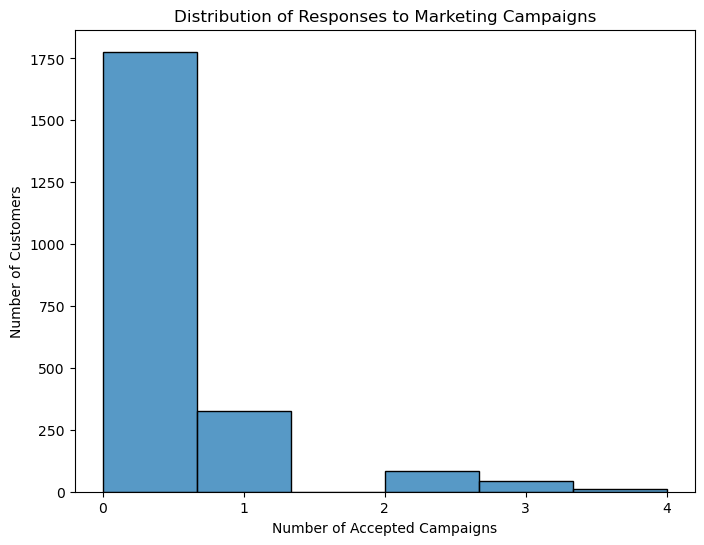

In [72]:
# Histogramme des réponses aux campagnes
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalAccepted'], bins=6, kde=False)
plt.title('Distribution of Responses to Marketing Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.xticks(range(0, df['TotalAccepted'].max() + 1))  # Ajuster les ticks de l'axe des x
plt.show()

## Interprétation des Résultats
#### Aucune Acceptation (0) :

##### Si le nombre de clients ayant accepté aucune campagne est élevé, cela peut indiquer que les campagnes ne sont pas assez attrayantes ou que le ciblage des clients n'est pas optimal.
##### Il pourrait être nécessaire de revoir les offres ou la manière dont elles sont présentées.
#### Acceptations Limitées (1 à 4) :

#### Clients ayant accepté 1 campagne : 
##### Cela pourrait indiquer que certains clients ont trouvé une offre intéressante, mais qu'ils ne sont pas convaincus par les autres.
#### Clients ayant accepté 2 à 4 campagnes :
##### Cela montre que certains clients réagissent positivement aux offres, ce qui est un bon signe.
##### Ces clients pourraient être plus engagés ou plus susceptibles d'acheter, ce qui est une opportunité à exploiter.

## Analyse Plus Approfondie


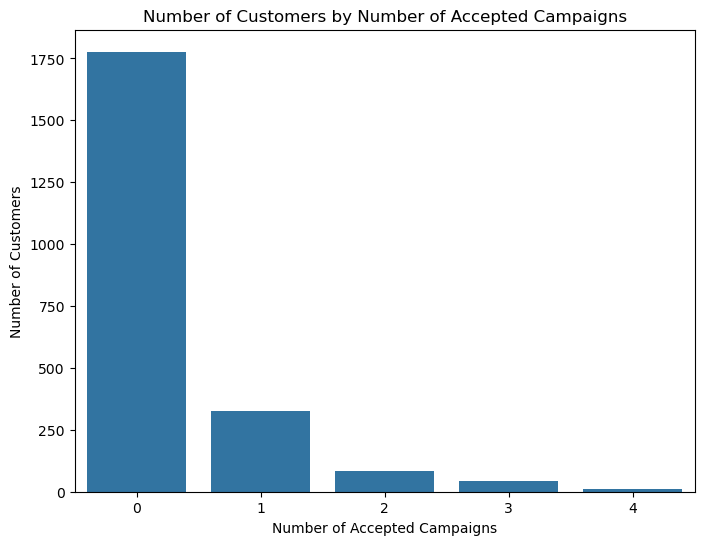

In [75]:
# Barplot du nombre de clients par nombre de campagnes acceptées
plt.figure(figsize=(8, 6))
sns.countplot(x='TotalAccepted', data=df)
plt.title('Number of Customers by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.xticks(range(0, df['TotalAccepted'].max() + 1))
plt.show()


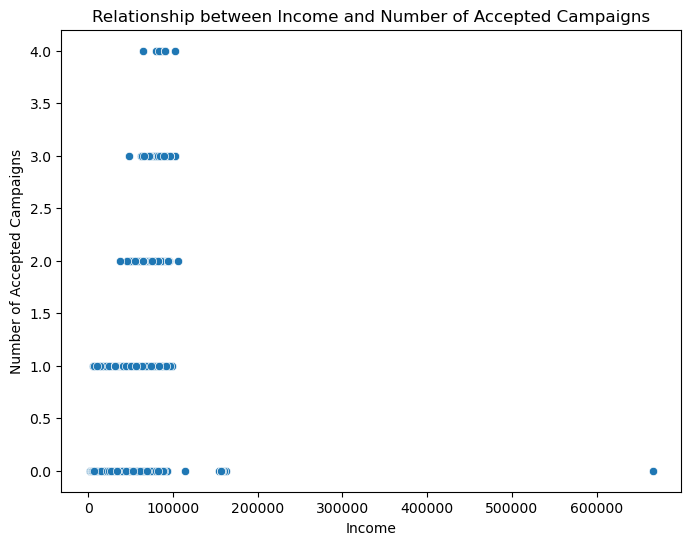

In [77]:
# Graphique de dispersion pour voir la relation entre le revenu et le nombre de campagnes acceptées
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='TotalAccepted', data=df)
plt.title('Relationship between Income and Number of Accepted Campaigns')
plt.xlabel('Income')
plt.ylabel('Number of Accepted Campaigns')
plt.show()


## Conclusion
##### L'analyse des réponses aux campagnes marketing fournit des informations précieuses sur le comportement des clients. 
##### En observant que le nombre d'acceptations varie de 1 à 4

 ## Analyse des Visites Web et des Achats en Ligne
##### Il est également pertinent de comprendre le comportement des clients vis-à-vis des achats en ligne

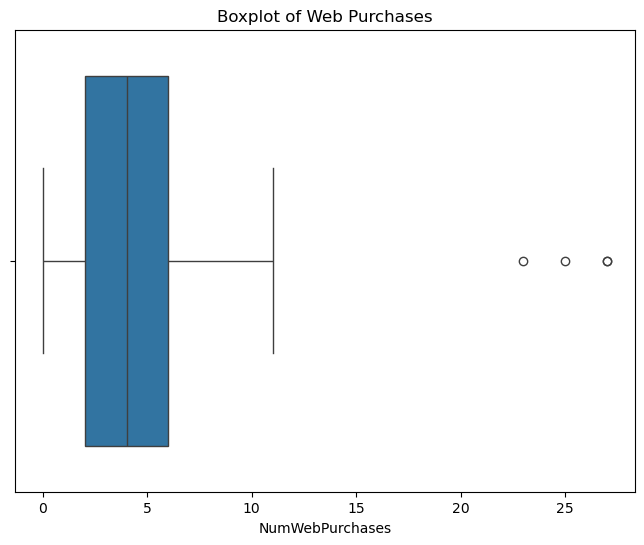

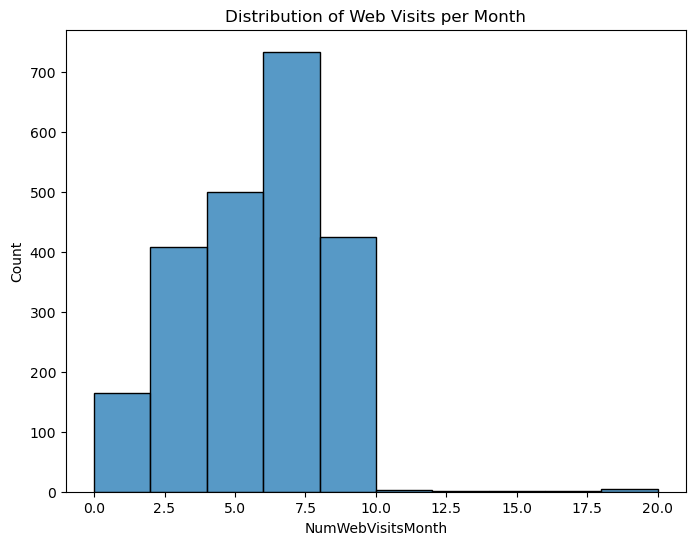

In [82]:
# Boxplot des achats en ligne
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['NumWebPurchases'])
plt.title('Boxplot of Web Purchases')
plt.show()

# Histogramme des visites sur le site web
plt.figure(figsize=(8, 6))
sns.histplot(df['NumWebVisitsMonth'], bins=10, kde=False)
plt.title('Distribution of Web Visits per Month')
plt.show()


## Histogramme des Visites sur le Site Web (NumWebVisitsMonth)
### Distribution des Visites :

##### Avec un pic aux alentours de 7.5 visites par mois et une valeur de 700 clients, 
##### cela montre qu'une grande partie des clients visitent le site plusieurs fois par mois.
### Interprétation :

##### Un grand nombre de clients visitent le site régulièrement, mais cela ne se traduit pas nécessairement par un nombre élevé d'achats en ligne,
##### ce qui pourrait être préoccupant.

## Recommandations
#### En fonction de l'analyse des visualisations, voici quelques recommandations :
#### Amélioration des Achats en Ligne
### Analyser les Motifs des Achats :
##### Il est crucial de comprendre pourquoi la majorité des clients n'effectuent pas d'achats en ligne malgré des visites régulières.
##### Cela peut impliquer des enquêtes auprès des clients ou une analyse des commentaires.
### Promotions et Incitations :
##### Mettre en place des promotions attractives pour encourager les achats en ligne, 
##### telles que des réductions pour les premiers achats ou des offres groupées.

## la Segmentation des Clients avec K-means

### Choix du Nombre de Clusters

In [110]:
# Suppression des lignes avec des valeurs manquantes
df_cleaned = df.dropna()

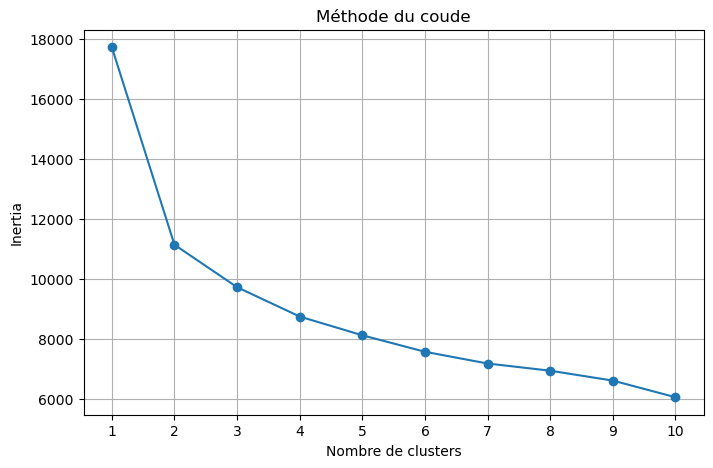

In [123]:
features = df_cleaned[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency']]
# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Méthode du coude
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Tracons la courbe
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


In [152]:
print(f'Length of clusters: {len(clusters)}')
print(f'Length of DataFrame: {len(df)}')

Length of clusters: 2216
Length of DataFrame: 2240


In [156]:
from sklearn.preprocessing import LabelEncoder

# Identifier les colonnes non numériques
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Encoder chaque colonne non numérique
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [158]:
df_clean = df.dropna()

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supposons que nous avez déjà effectué le nettoyage des données et obtenu df_clean

# Normalisons les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# Exécutons K-means
optimal_k = 3  # Assurons-nous que ce soit le nombre de clusters que vous souhaitez
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# on Utilise .loc pour éviter SettingWithCopyWarning
df_clean.loc[:, 'Cluster'] = clusters

# Si nous voulons ajouter la colonne 'Cluster' au DataFrame d'origine
df['Cluster'] = None  # Créons la colonne dans le DataFrame d'origine

# Mettrons à jour la colonne 'Cluster' uniquement pour les lignes qui existent dans df_clean
df.loc[df_clean.index, 'Cluster'] = df_clean['Cluster']


In [174]:
# Statistiques descriptives par cluster
cluster_analysis = df_clean.groupby('Cluster').mean()
cluster_analysis

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAccepted
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5585.991722,1970.601821,2.318709,3.714404,37108.889901,0.745033,0.521523,335.070364,48.469371,75.267384,...,0.068709,0.023179,0.000000,0.003311,0.001656,0.011589,3.0,11.0,0.096026,0.096854
1,5608.310078,1966.073643,2.510336,3.744186,67633.246770,0.087855,0.582687,319.392765,49.879845,510.939276,...,0.062016,0.069767,0.001292,0.009044,0.000000,0.007752,3.0,11.0,0.124031,0.142119
2,5534.534188,1968.709402,2.397436,3.726496,79505.286325,0.047009,0.166667,321.841880,48.948718,810.653846,...,0.136752,0.350427,0.688034,0.559829,0.119658,0.004274,3.0,11.0,0.517094,1.854701


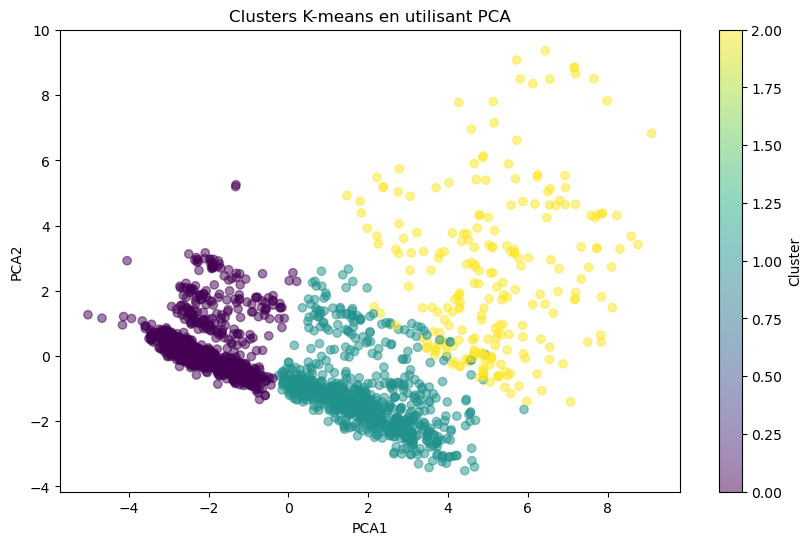

In [178]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimensionnalité
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Créer un DataFrame pour les résultats PCA
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Visualisons les clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters K-means en utilisant PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()


In [182]:
# Compter le nombre d'observations dans chaque cluster
cluster_sizes = df_clean['Cluster'].value_counts()
cluster_sizes

Cluster
0    1208
1     774
2     234
Name: count, dtype: int64

In [184]:
df_clean.to_csv('clustered_data.csv', index=False)

##### la segmentation des clients à l'aide de méthodes de clustering, comme K-means, permet de regrouper des observations similaires dans des ensembles appelés clusters. 
##### Le résultat que vous avez obtenu montre le nombre d'observations (clients) 
##### dans chaque cluster, ce qui est essentiel pour comprendre la distribution et les caractéristiques de vos segments de clientèle

## Clusters
#### Un cluster est un groupe d'observations qui partagent des caractéristiques similaires. Dans le contexte de notre analyse 

### Cluster 0 (1208 clients) :
##### C'est le plus grand groupe, représentant la majorité des observations. 
##### Les clients de ce cluster peuvent partager des traits communs,
##### tels qu'un comportement d'achat régulier ou des caractéristiques démographiques spécifiques.

### Cluster 1 (774 clients) :
##### C'est le plus grand groupe, représentant la majorité des observations. Les clients de ce cluster peuvent partager des traits communs, tels qu'un comportement d'achat régulier ou des caractéristiques démographiques spécifiques.

### Cluster 2 (234 clients) :
#####  Ce cluster représente le plus petit groupe. Les clients dans ce segment peuvent avoir des besoins ou des préférences très spécifiques, ou bien ils peuvent être moins engagés avec votre marque.

### Calcul de l'Âge
##### Pour obtenir l'âge des clients, vous pouvez calculer la différence entre l'année actuelle et l'année de naissance. Voici comment le faire :

In [221]:
import pandas as pd
from datetime import datetime

# Supposons que df_clean soit votre DataFrame
current_year = datetime.now().year
df_clean.loc[:, 'Age'] = current_year - df_clean['Year_Birth']

In [230]:
# 1. Analyse des données démographiques par cluster (y compris l'âge)
demographics_analysis = df_clean.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Education': lambda x: x.value_counts().index[0],  # mode
    'Marital_Status': lambda x: x.value_counts().index[0]  # mode
}).reset_index()

print("Analyse démographique par cluster:")
print(demographics_analysis)

# 2. Analyse des comportements d'achat par cluster
purchase_behavior_analysis = df_clean.groupby('Cluster').agg({
    'Income': ['mean', 'sum'],
    'MntWines': ['mean', 'sum'],
    'Kidhome': ['mean', 'sum'],
    'Teenhome': ['mean', 'sum'],
    'Recency': ['mean', 'std']
}).reset_index()

print("\nAnalyse des comportements d'achat par cluster:")
print(purchase_behavior_analysis)

# 3. Analyse des réactions aux campagnes par cluster
campaign_reaction_analysis = df_clean.groupby('Cluster').agg({
    'AcceptedCmp1': 'sum',
    'AcceptedCmp2': 'sum',
    'AcceptedCmp4': 'sum',
    'AcceptedCmp5': 'sum',
    'Complain': 'sum',
    'TotalAccepted': 'sum'
}).reset_index()

"\nAnalyse des réactions aux campagnes par cluster:"
campaign_reaction_analysis


Analyse démographique par cluster:
  Cluster        Age                   Education Marital_Status
                mean median        std  <lambda>       <lambda>
0       0  53.398179   52.0  11.428009         2              3
1       1  57.926357   58.0  11.584819         2              3
2       2  55.290598   55.0  14.223875         2              3

Analyse des comportements d'achat par cluster:
  Cluster        Income                MntWines           Kidhome       \
                   mean         sum        mean     sum      mean  sum   
0       0  37108.889901  44827539.0   75.267384   90923  0.745033  900   
1       1  67633.246770  52348133.0  510.939276  395467  0.087855   68   
2       2  79505.286325  18604237.0  810.653846  189693  0.047009   11   

   Teenhome         Recency             
       mean  sum       mean        std  
0  0.521523  630  48.469371  28.931151  
1  0.582687  451  49.879845  29.014825  
2  0.166667   39  48.948718  28.871135  


,Cluster,AcceptedCmp1,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,Complain,TotalAccepted
0,0,4,2,28,0,14,117
1,1,7,0,54,1,6,110
2,2,131,28,82,161,1,434


 ## une modélisation prédictive dans le cadre de notre projet

In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supposons que df_clean soit votre DataFrame nettoyé
# Sélection des variables explicatives (features) et de la variable cible
X = df_clean[['Age', 'Income', 'Recency', 'MntWines', 'Kidhome', 'Teenhome', 'TotalAccepted']]
y = df_clean['Response']

# Séparation des données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [238]:
model = LogisticRegression(max_iter=1000)  # Par exemple, augmentons à 1000 itérations
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [242]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reprendre l'entraînement avec les données mises à l'échelle
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)


In [244]:
model = LogisticRegression(solver='liblinear')  # Utilisation d'un autre solveur
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Précision (Positive Predictive Value)
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Rappel (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')


Accuracy: 0.87
Precision: 0.60
Recall: 0.29
F1-Score: 0.39


## Améliorations possibles

In [253]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [255]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.3).astype(int)  # Par exemple, baisser le seuil à 0.3

C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [257]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [259]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f'F1-score moyen : {scores.mean()}')


F1-score moyen : 0.40758079145901893


### Un F1-score moyen de 0.41 montre que votre modèle a encore des difficultés à équilibrer la précision et le rappel.

### Analyse des caractéristiques (features) :
##### Vérifiez si toutes les variables utilisées sont pertinentes. Certaines variables pourraient être inutiles ou même nuisibles. Une sélection de caractéristiques ou une réduction de la dimension (comme l'Analyse en Composantes Principales - PCA) pourrait aider à améliorer le modèle.

In [263]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Sélectionner les 10 meilleures caractéristiques
X_new = selector.fit_transform(X_train_scaled, y_train)


C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


In [265]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [267]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)


In [269]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)
print(f"Meilleurs paramètres : {grid_search.best_params_}")


Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


In [270]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
thresholds = [0.3, 0.4, 0.5, 0.6]
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Seuil : {thresh}, F1-Score : {f1}")


Seuil : 0.3, F1-Score : 0.2450592885375494
Seuil : 0.4, F1-Score : 0.2450592885375494
Seuil : 0.5, F1-Score : 0.35294117647058826
Seuil : 0.6, F1-Score : 0.0


C:\Users\MOHAMED FAYE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
